# Analyse af partiklerne $\Lambda$(lambda)- og $\bar{\Lambda}$ (anitlambda) massefordeling med data fra ALEPH:
I denne notebook kommer du til at arbejde med massefordelingen for $\Lambda$- og $\bar{\Lambda}$ partiklerne, med data fra ALEPH-detektoren. Vi vil undersøge hvor meget partiklens massefordeling ligner sin antipartikels. 

Ligesom i forrige notebook: koden du vil møde i høj grad bliver forklaret og fokus vil være på at du forstår fortolkningen af resultaterne.
___
## Teoriafsnit
### $\Lambda$- og $\bar{\Lambda}$-partiklerne
Disse partikler er også nogle af de henfald der kan komme fra $V^0$ partiklen.
Vi skal også undersøge massen af $\Lambda$(lambda) og dens antipartikel $\bar\Lambda$(antilambda). Disse typer partikler hører til hadronfamilien, med "kvarkeparringen" af 3 kvarker. Dem vi kalder baryoner. 
- $\Lambda$ baryonen består af en up-kvark, en down-kvark og en strange-kvark
    - $\Lambda = (u) + (d) + (s)$
    
- $\bar\Lambda$ af en anti up-kvart, anti down-kvark og anti strange-kvark. 
    - $\bar\Lambda = (\bar{u}) + (\bar{d}) + (\bar{s}) $


<i>(Tegnet $\Lambda$ (lambda) kommer fra det græske alfabet, som jeg tidligere nævnte at fysikere flittigt låner fra.) </i>
___ 
___
### I analysen bliver i bedt om:
Ved at bruge den tilgængelige data og jeres statistiske viden skal I:
1. Vurdere fordelingen af massen af $\lambda$-partikler:
    - Sammenligne fordelingen med målingerne af dens antipartikel $\bar{\Lambda}$

2. Gentage processen for Monte Carlo simuleringerne af ALEPH-detektoren
3. Sammenligne middelværdierne og spredningerne for $\lambda$ og $\bar{\Lambda}$ data og Monte Carlo. 
4. Se visualisering af hvor tæt de ligger op af hinanden
5. Sammenligne værdien med Particle Data Groups' (PDG) tabelværdi

In [1]:
# Indlæs pakker 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy.stats import chi2
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

## Åbne filer: 
Du skal åbne massefordelingerne for k0 data og k0 monte carlo data. 

In [4]:
# Åbne filerne ()
Lambda = np.load('lambda.npy')
Lambda_mc = np.load('lambda_mc.npy')

antilambda = np.load('anti_lambda.npy')
antilambda_mc = np.load('anti_lambda_mc.npy')

## Plot data 
1) Start med at køre cellen under igennem og se plottet for $\Lambda$-data
    - Besvar spørgsmål 1 under plottet
2) Fjern "#" foran plt.hist(antilambda, bins = bins......) for at plotte $\bar{\Lambda}$-data
    - Besvar spørgsmål 2 under plottet

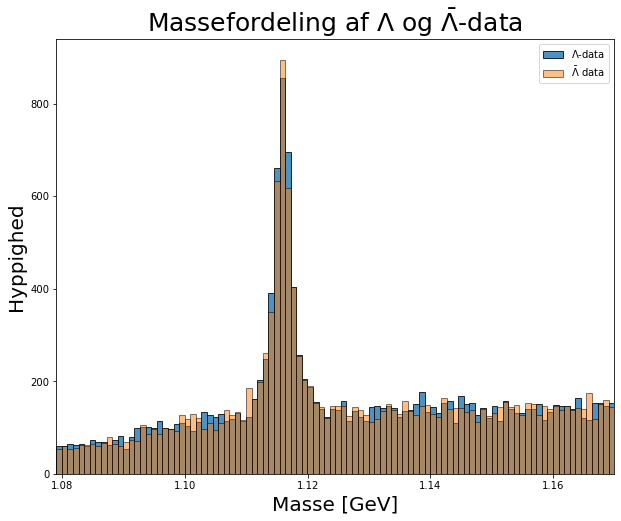

In [6]:
#Plot inputs (skal ikke ændres)
bins = 100
xmin, xmax = (1.079, 1.17)
bin_range = (xmin, xmax) 

#Begynd plot
plt.figure(figsize=(10,8))
plt.title(f'Massefordeling af ' r'$\Lambda$' f' og 'r'$\bar{\Lambda}$'f'-data', fontsize = 25) 


# Data for k0 partikkel
hist = plt.hist(Lambda, bins = bins, range = bin_range, label =  r'$\Lambda$'f'-data', alpha = 0.8, edgecolor ='black')

# MC data for k0 partikkel:
###################################################
# Fjern '#' på linjen under under for at se antilambda massefordeling
plt.hist(antilambda, bins = bins, range = bin_range, label = r'$\bar{\Lambda}$'f' data', alpha =0.5, edgecolor ='black')
###################################################

plt.xlim(xmin,xmax)
plt.xlabel('Masse [GeV]', fontsize = 20)
plt.ylabel('Hyppighed', fontsize = 20)
plt.legend()
plt.show()

### Spørgsmål:
1) Er fordelingen normalfordelt? (hint: er der fuldstændig symmetri?)

2) Er der tegn på at partiklen $\Lambda$ og dens antipartikkel $\bar{\Lambda}$ deler egenskaben masse ud fra at se på deres fordelinger? (Husker du hvad du lærte om antipartikler i standard modellen del 1?)

Svar <b>her:</b>
1) Fordelingen ser endnu mindre symmetrisk ud end den fra forrige notebook.
2) Det ligner at der er sammenhæn mellem både middelværdi og spredning ud fra det vi kan se med det blotte øje.

___

# Plot Monte Carlo genereret data:
Nu har du set massefordelingerne for partiklerne som stammer fra ægte målinger taget af ALEPH detektoren. Men er det også sådan man vil forudsige tilfældig data vil opførere sig ved mange antal målinger? 

Vi gentager processen men med Monte Carlo data:
1) Start med at køre cellen under igennem og se plottet for $\Lambda$-MC
    - Besvar spørgsmål 1 under plottet
2) Fjern "#" foran plt.hist(antilambda, bins = bins......) for at plotte $\bar{\Lambda}$-MC
    - Besvar spørgsmål 2 under plottet

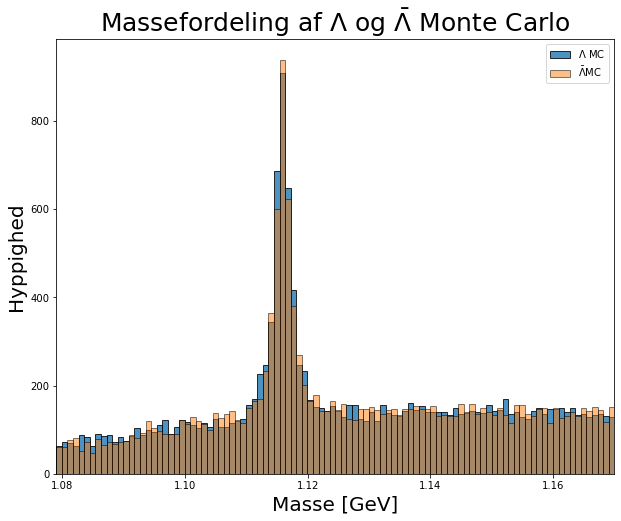

In [7]:
#Plot inputs (skal ikke ændres)
bins = 100
 

#Begynd plot
plt.figure(figsize=(10,8))
plt.title(f'Massefordeling af ' r'$\Lambda$' f' og 'r'$\bar{\Lambda}$'f' Monte Carlo', fontsize = 25) 


# Data for k0 partikkel
hist = plt.hist(Lambda_mc, bins = bins, range = bin_range, label =  r'$\Lambda$'f' MC', alpha = 0.8, edgecolor ='black')


###################################################
# MC data for k0 partikkel: # Fjern '#' på linjen under for at se antilambda MC massefordeling
plt.hist(antilambda_mc, bins = bins, range = bin_range, label = r'$\bar{\Lambda}$'f'MC', alpha =0.5, edgecolor ='black')
###################################################

plt.xlim(xmin,xmax)
plt.xlabel('Masse [GeV]', fontsize = 20)
plt.ylabel('Hyppighed', fontsize = 20)
plt.legend()
plt.show()

### Spørgsmål:
1) Er fordelingen for Monte Carlo normalfordelt? (hint: er der fuldstændig symmetri?)

2) Opfører Monte Carlo dataen sig som den målte? (Her beder vi bare om øjemål ved middelværdien, du sammenligner ved at scrolle op til forrige plot og se for data)

Svar <b>her:</b>
1) Den ligner ikke en normalfordeling.
2) Den ligner til gengæld dataen, hvilket er et positivt tegn for vores dataanalyse

___
<b><u>*Dette punkt er ikke vigtigt at forstå for analysen, men hvis du vil vide hvad der sker i koden er der nedunder givet en kort forklaring:<b><u>


## Fit funktioner og inputs: bare tryk [shift] + [enter] for at køre koden
Det eneste der varierer fra den forrige notebook er fitfunktionen:    
### Beskrivelse af fitfunktionen
Som du muligvis lærte i sidste notebook, skal der grimmere funktioner til når fordelingen ikke er fuldstændigt symmetrisk normaltfordelt. For Lambda og antilambda er den dårlige nyhed at funktionen er endnu fælere, men den gode nyhed er at de ligner hinanden, så vi skal kun bruge 1 gættefunktion.
    
Som du kan se er der 2 Gaussfunktioner der repræsenterer signalet og en ret ubehagelig baggrundsfunktion der består af en potensfunktion sammensat med en eksponentielt faldende. 

In [8]:
# Funktioner der skal bruges
def behandledata(masse_data, bin_range, bins, startgæt, label):
    # Histogram og fejlberegning
    counts, bin_edges, _ = plt.hist(masse_data, bins=bins, range=bin_range, alpha=0.5, label=label)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    uncertainties = np.sqrt(counts)
    plt.errorbar(bin_centers, counts, yerr=uncertainties, fmt='.')
    params, covariance = curve_fit(fitfunktion2, bin_centers, counts, p0= startgæt, sigma=uncertainties, absolute_sigma=True)
    errors = np.sqrt(np.diag(covariance))
    return bin_centers, counts, uncertainties, params, errors


#Vores nye fitfunktion
def fitfunktion2(x, A1, mu1, sigma1, A2, mu2, sigma2, N, n, a):
    gauss1 = A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    gauss2 = A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    background = N * (x - 1.078)**n * np.exp(-a * (x - 1.078))
    return gauss1 + gauss2 + background


#startgæt:
startgæt1 = [850, 1.115, 0.005, 300, 1.120, 0.004, 200, 1, 10] #for lambda
startgæt2 = [800, 1.115, 0.005, 400, 1.120, 0.004, 200, 1, 10] #for antilambda



In [9]:
#Databehandling
fig = plt.figure()
#######################Fit lambda:##########################
#data
X1, Y1, yerr1, params1, errors1 = behandledata(Lambda, bin_range, bins, startgæt1, label =r'$\lambda$'f'-data')
x_fit1 = np.linspace(min(X1),max(X1), 1000)
y_fit1 = fitfunktion2(x_fit1, *params1)
data_fit1 = plt.plot(x_fit1, y_fit1, label ='test')

# Monte Carlo
X1_mc, Y1_mc, yerr1_mc, params1_mc, errors1_mc = behandledata(Lambda_mc, bin_range, bins, startgæt1, label =r'$\lambda$'f'-MC')
x_fit1_mc = np.linspace(min(X1_mc),max(X1_mc), 1000)
y_fit1_mc = fitfunktion2(x_fit1_mc, *params1_mc)

#######################Fit antilambda:##########################
X2, Y2, yerr2, params2, errors2 = behandledata(antilambda, bin_range, bins, startgæt2, label =r'$\bar{\lambda$}'f'-data')
x_fit2 = np.linspace(min(X2),max(X2), 1000)
y_fit2 = fitfunktion2(x_fit2, *params2)
data_fit2 = plt.plot(x_fit2, y_fit2, label ='test')

# Monte Carlo
X2_mc, Y2_mc, yerr2_mc, params2_mc, errors2_mc = behandledata(antilambda_mc, bin_range, bins, startgæt2, label =r'$\bar{\lambda$}$'f'-MC')
x_fit2_mc = np.linspace(min(X2_mc),max(X2_mc), 1000)
y_fit2_mc = fitfunktion2(x_fit2_mc, *params2_mc)


plt.close(fig)


___
## Plot resultaterne(Lang plotfunktion): tryk [shift] + [enter]
Følgende afsnit visualiserer den databehandling i cellen foroven. Vi plotter flere plots i samme figur, derfor er det en meget lang kode. 

Når du har kørt cellen vil du se:


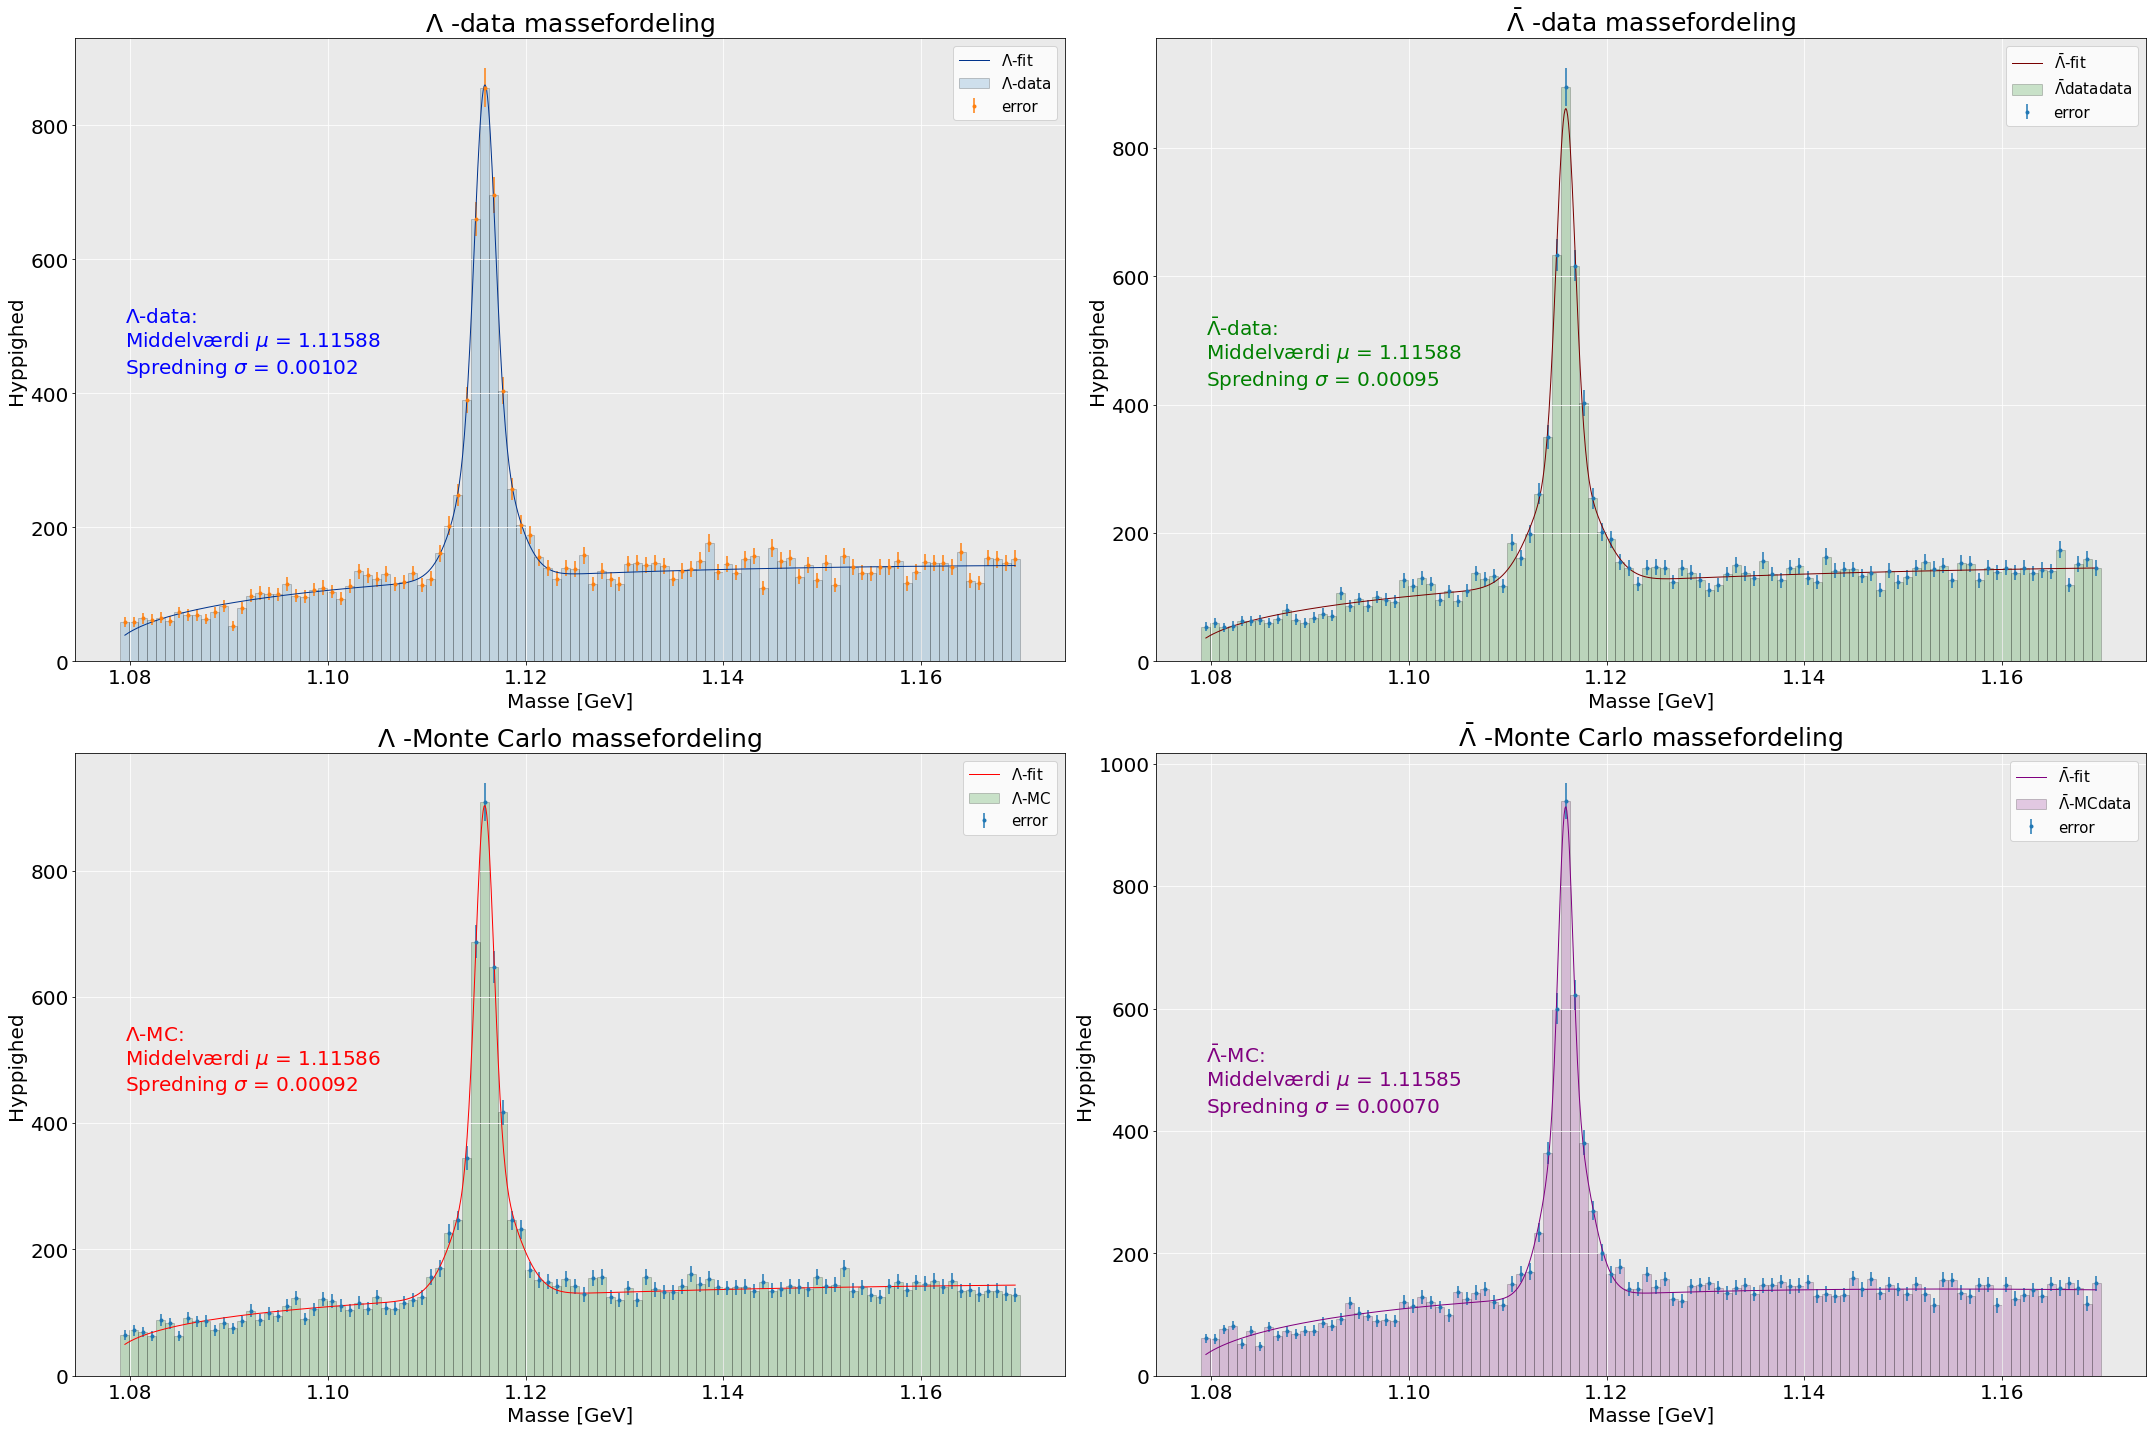

In [10]:
# Opret figur og gridspe
fig = plt.figure(figsize=(30, 20))
gs = fig.add_gridspec(2, 2)

# Opret akser
axs = []
axs.append(fig.add_subplot(gs[0, 0]))  
axs.append(fig.add_subplot(gs[0, 1]))  

axs.append(fig.add_subplot(gs[1, 0]))  
axs.append(fig.add_subplot(gs[1, 1]))  


# Plot i stor subplot
#text
#axs[0].text(min(x_fit), max(y_fit) * 0.5, f"Data:\n$\mu$ = {params[1]:.5f}\n$\sigma$ = {abs(params[2]):.5f}", color='Blue', fontsize = 20)
#axs[1].text(min(x_fit), max(y_fit_mc) * 0.5, f"MC:\n$\mu$ = {params_mc[1]:.5f}\n$\sigma$ = {abs(params_mc[2]):.5f}", color='Red', fontsize = 20)

#######################DATA lambda + antilambda:##########################
# Lambda Data
axs[0].hist(Lambda, bins=bins, range=bin_range, alpha=0.2, edgecolor='black', label=r'$\Lambda$' f'-data')
axs[0].plot(x_fit1, y_fit1,label=r'$\Lambda$' f'-fit', linewidth = 1 ,color = '#00338c')
axs[0].errorbar(X1, Y1, yerr=yerr1, fmt='.', label = 'error')
axs[0].set_title(r'$\Lambda$' f' -data massefordeling', fontsize =25)
axs[0].set_xlabel("Masse [GeV]", fontsize = 20)
axs[0].set_ylabel("Hyppighed", fontsize = 20)
axs[0].legend(fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].set_facecolor('#eaeaea')
axs[0].grid(color = 'w')
axs[0].text(min(x_fit1), max(y_fit1) * 0.5, r'$\Lambda$'f"-data:\nMiddelværdi $\mu$ = {params1[1]:.5f}\nSpredning $\sigma$ = {abs(params1[2]):.5f}", color='Blue', fontsize = 20)

# Antilambda data
axs[1].hist(antilambda, bins=bins, range=bin_range, alpha=0.2, color='green', edgecolor='black', label=r'$\bar{\Lambda}$' f'data'f'data')
axs[1].plot(x_fit2, y_fit2 ,linewidth = 1, label=r'$\bar{\Lambda}$' f'-fit', color="#780000")
axs[1].errorbar(X2, Y2, yerr=yerr2, fmt='.', label = 'error')
axs[1].set_title(r'$\bar{\Lambda}$' f' -data massefordeling', fontsize = 25)
axs[1].set_xlabel("Masse [GeV]", fontsize = 20)
axs[1].set_ylabel("Hyppighed", fontsize = 20)
axs[1].legend(fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].set_facecolor('#eaeaea')
axs[1].grid(color = 'w')
axs[1].text(min(x_fit2), max(y_fit2) * 0.5, r'$\bar{\Lambda}$'f"-data:\nMiddelværdi $\mu$ = {params2[1]:.5f}\nSpredning $\sigma$ = {abs(params2[2]):.5f}", color='Green', fontsize = 20)

#######################Monte Carlo: lambda + antilambda:##########################
# Lambda Data
axs[2].hist(Lambda_mc, bins=bins, range=bin_range, alpha=0.2, color ='green' ,edgecolor='black', label=r'$\Lambda$' f'-MC')
axs[2].plot(x_fit1_mc, y_fit1_mc,label=r'$\Lambda$' f'-fit', linewidth = 1 ,color = 'red')
axs[2].errorbar(X1_mc, Y1_mc, yerr=yerr1_mc, fmt='.', label = 'error')
axs[2].set_title(r'$\Lambda$' f' -Monte Carlo massefordeling', fontsize =25)
axs[2].set_xlabel("Masse [GeV]", fontsize = 20)
axs[2].set_ylabel("Hyppighed", fontsize = 20)
axs[2].legend(fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=20)
axs[2].set_facecolor('#eaeaea')
axs[2].grid(color = 'w')
axs[2].text(min(x_fit1_mc), max(y_fit1_mc) * 0.5, r'$\Lambda$'f"-MC:\nMiddelværdi $\mu$ = {params1_mc[1]:.5f}\nSpredning $\sigma$ = {abs(params1_mc[2]):.5f}", color='red', fontsize = 20)

# Antilambda data
axs[3].hist(antilambda_mc, bins=bins, range=bin_range, alpha=0.2, color='purple', edgecolor='black', label=r'$\bar{\Lambda}$' f'-MC'f'data')
axs[3].plot(x_fit2_mc, y_fit2_mc ,linewidth = 1, label=r'$\bar{\Lambda}$' f'-fit', color="purple")
axs[3].errorbar(X2_mc, Y2_mc, yerr=yerr2, fmt='.', label = 'error')
axs[3].set_title(r'$\bar{\Lambda}$' f' -Monte Carlo massefordeling', fontsize = 25)
axs[3].set_xlabel("Masse [GeV]", fontsize = 20)
axs[3].set_ylabel("Hyppighed", fontsize = 20)
axs[3].legend(fontsize=15)
axs[3].tick_params(axis='both', which='major', labelsize=20)
axs[3].set_facecolor('#eaeaea')
axs[3].grid(color = 'w')
axs[3].text(min(x_fit2), max(y_fit2) * 0.5, r'$\bar{\Lambda}$'f"-MC:\nMiddelværdi $\mu$ = {params2_mc[1]:.5f}\nSpredning $\sigma$ = {abs(params2_mc[2]):.5f}", color='purple', fontsize = 20)

# Tilføj en stor overtitel
#    fig.suptitle(f' {title}-Massplots', fontsize= 40, va = 'bottom')
# Juster layout
fig.tight_layout()
#plt.savefig(saveas)
plt.show()

## Spørgsmål:
1) Sammenlign $\Lambda$-data og $\bar{\Lambda}$-data middelværdier og spredninger
2) Gør det samme for $\Lambda$-MC og $\bar{\Lambda}$-MC
3) Kan vi, på trods af fittet ikke sidder perfekt op af fordelingerne, sige noget om partikler og deres antipartikler deler egenskaben masse? 

Svar <b>her:</b>
1) Middelværdien er fuldstændig den samme for lambda og antilambda dataen, spredningen varierer med en størrelse på 0.00007, hvilket også er rimelig tæt på hinanden!
2) Middelværdien ligger meget tæt på hinanden for MC, med en forskel på 0.00001, spredningen variere med lidt mere med en forskel på 0.00022.
3) Med middelværdier og spredninger der har så lille forskel, kan vi se at der er en sammenhæng mellem massefordelingerne, men for at være på den sikre side kan vi dobbeltjekke når vi sammenligner med tabelværdierne.

___

## Lad os zoome ind på de fits vi har lavet og sammenligne dem:

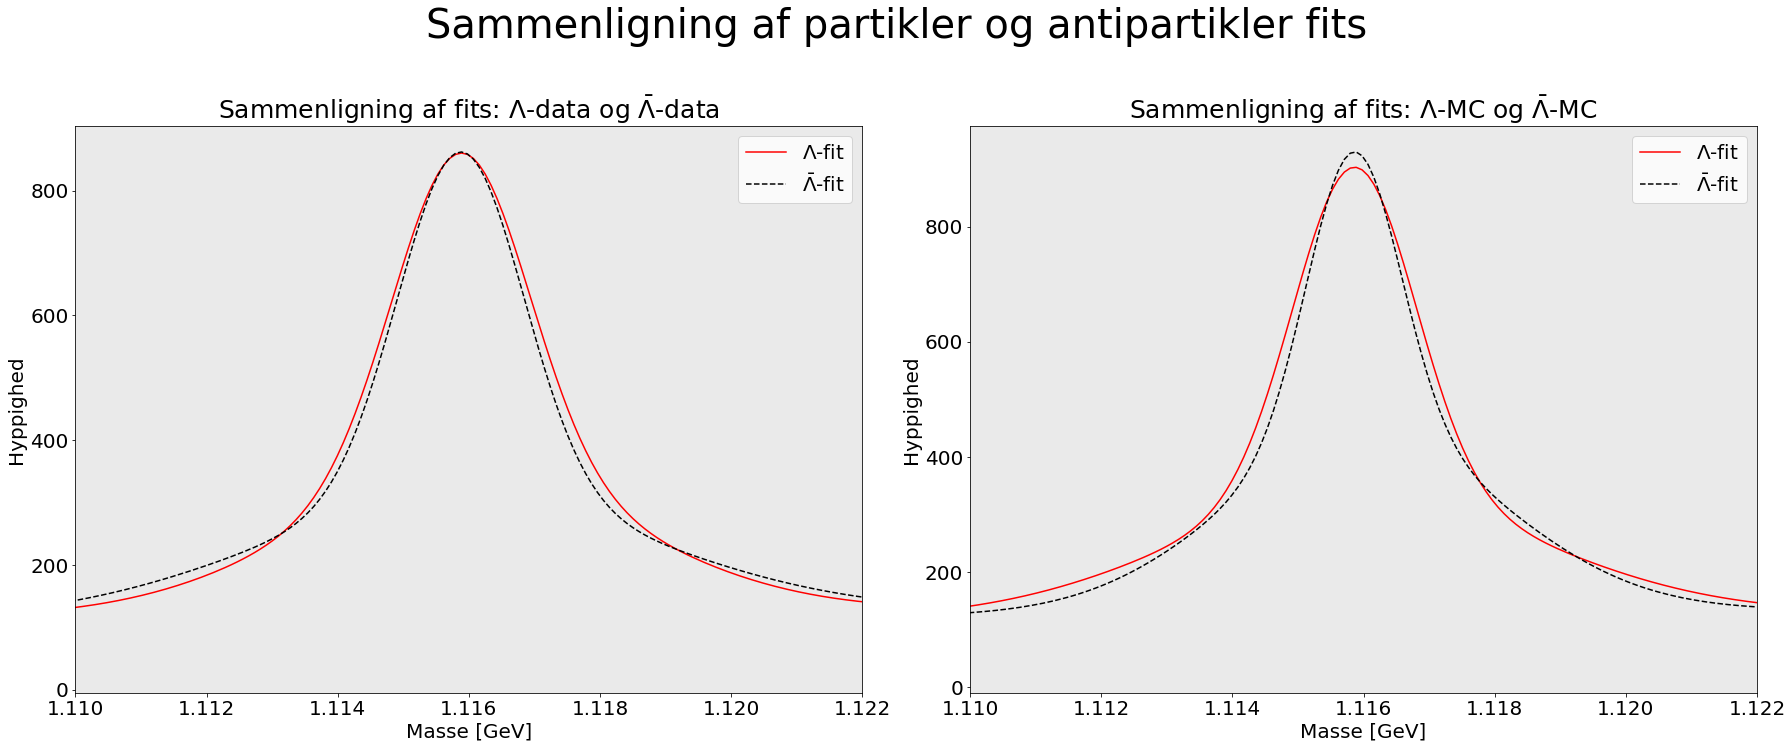

In [11]:
# Opret figur og gridspe
fig = plt.figure(figsize=(25, 10))
gs = fig.add_gridspec(1, 2)

# Opret akser
axs = []
axs.append(fig.add_subplot(gs[0, 0]))  
axs.append(fig.add_subplot(gs[0, 1]))  


#FITS sammenligning: data
axs[0].plot(x_fit1, y_fit1,label=r'$\Lambda$' f'-fit', color="#ff0000", alpha=1)
axs[0].plot(x_fit2, y_fit2,'--', label=r'$\bar{\Lambda}$' f'-fit', color="#000000", alpha=1)
axs[0].set_title(f'Sammenligning af fits: ' r'$\Lambda$' f'-data og 'r'$\bar{\Lambda}$'f'-data', fontsize = 25)
axs[0].set_xlabel("Masse [GeV]", fontsize = 20)
axs[0].set_ylabel("Hyppighed", fontsize = 20)
axs[0].set_xlim(1.11,1.122)
axs[0].legend(fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].set_facecolor('#eaeaea')

#FITS sammenligning: Monte Carlo
axs[1].plot(x_fit1_mc, y_fit1_mc, label=r'$\Lambda$' f'-fit', color="#ff0000", alpha=1)
axs[1].plot(x_fit2_mc, y_fit2_mc,'--', label=r'$\bar{\Lambda}$' f'-fit', color="#000000", alpha=1)
axs[1].set_title(f'Sammenligning af fits: ' r'$\Lambda$' f'-MC og 'r'$\bar{\Lambda}$'f'-MC', fontsize = 25)
axs[1].set_xlabel("Masse [GeV]", fontsize = 20)
axs[1].set_ylabel("Hyppighed", fontsize = 20)
axs[1].set_xlim(1.11,1.122)
axs[1].legend(fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].set_facecolor('#eaeaea')
fig.suptitle(f'Sammenligning af partikler og antipartikler fits', fontsize= 40, va = 'bottom')
fig.tight_layout()
#plt.savefig(saveas)
plt.show()


### Her kan du se hvor tæt de egentlig ligger op af hinanden
(Endnu tættere end vores fit er relateret med hinanden). 
- Dette skyldes selvfølgelig at den eneste forskel mellem en partikkel og dens antipartikkel er deres ladning (lærte vi i standard modellen del 2).


___


## Sammenlign med tabelværdien

- PDG teoretisk værdi for $\Lambda$-masse findes [her](https://pdg.lbl.gov/2020/tables/rpp2020-tab-baryons-Lambda.pdf)

Stemmer dine værdier overens med tabelværdien? 

<i>(note: vi har målt i giga-eV og PDG angiver i mega-eV, derfor er der nogen eksponenters forskel)</i>

<b> Indsæt svar her</b>
Den angivede masse fra PDG er: Mass masse = 1115.683 ± 0.006 MeV
Når vi omregner vores værdier til Mev: 
 - Lambda data: masse = 1115.88 $\pm$ 0.102 Mev
 - Antiambda data: masse = 1115.88 $\pm$ 0.095 Mev
 - Lambda MC: masse = 1115.86 $\pm$ 0.092 Mev
 - Antilambda MC: masse = 115.85 $\pm$ 0.070 Me
 
 Antilambda Monte Carlo er altså den tabelværdi der kommer tættest på tabelværdien, men spredningen er stadig en eksponents forskel hvilket ikke er mega godt (Det siger mest noget om fittet).

___
## Konklusion

Du har nu gennemgået følgende emner:
#### 1) Hente ekstern data fra ALEPH ned til din notebook
I denne notebook skulle vi, ligesom i sidstem hente ekstern data som var foretaget af nogen andre.  

#### 2) Visualisering af massefordeling
Denne gang sammenlignede vi ikke data med Monte Carlo ligesom forrige gang, men i stedet sammenlignede vi massefordelingerne af $\Lambda$- og $\bar{Lambda}$-partiklerne. 

### 3) Fitfunktionen
Denne fitfunktion var noget mere kompliceret end den forrige og blev derfor ikke udforsket til fulde. Men du blev igen præsenteret for at data der ikke er fuldstændig symmetrisk skal have nogen flere krav til den gættefunktion. 

### 4) Plot resultater
Vi fik nu visualiseret databehandlingen for middelværdien og spredning som vores fit har givet os for de 4 forskellige fordelinger. På denne måde kunne vi analytisk vurdere hvor tæt partikler og antipartiklers målte data og Monte Carlo ligger. Og for at visualisere dette plottede vi deres fit op ad hinanden og så en tæt immitering af hinanden.

### 5) Sammenligne resultater med tabel-værdi fra PDG.
Ligesom i forrige notebook har vi på baggrund af vores dataanalyse sammenlignet vores resultater med en teoretisk tabelværdi
___
___

Tillykke, du er nu nået til vejs ende med vores partikel projekt! 